In [1]:
import pandas as pd
import lxml as lxml
import numpy as np
import html5lib as ht
from pandas.io.html import read_html
import matplotlib.pyplot as plt

In [2]:
pl1 = 'https://www.moneycontrol.com/financials/marutisuzukiindia/results/yearly/MS24#MS24'
pl2 = pl1.replace('#','/2#')
pl3 = pl1.replace('#','/3#')
bl1 = pl1.replace('results/yearly','balance-sheetVI')
bl2 = bl1.replace('#','/2#')
bl3 = bl1.replace('#','/3#')

In [3]:
p1 = pd.read_html(pl1,index_col=0,header=0)[0]
p2 = pd.read_html(pl2,index_col=0,header=0)[0]
p3 = pd.read_html(pl3,index_col=0,header=0)[0]

In [4]:
b1 = pd.read_html(bl1,index_col=0,header=0)[0]
b2 = pd.read_html(bl2,index_col=0,header=0)[0]
b3 = pd.read_html(bl3,index_col=0,header=0)[0]

In [5]:
index = p1.index.name
index2 = b1.index.name

In [6]:
p = p1.merge(p2, on = index).merge(p3, on = index)
b = b1.merge(b2, on = index2).merge(b3, on = index2)

In [7]:
p = p[:25]
b=b[:42]
b = b.drop([b1.index[0]])
p.columns = b.columns
f = p.append(b)

In [8]:
f =f.replace("--","0")
f = f.sort_index(axis=1 ,ascending=True)
f = f.drop(f.columns[[-3,-2,-1]], axis = 1)
f = f.apply(pd.to_numeric) 

In [9]:
corr = f.T.corr()
r =  corr.iat[1,1]
corr = corr.replace(to_replace = r, value = int(.001))
max_corrwith  = corr.idxmax(axis=1)

In [10]:
YoY = (f/f.shift(periods=1, axis='columns'))-1
YoY = YoY.T

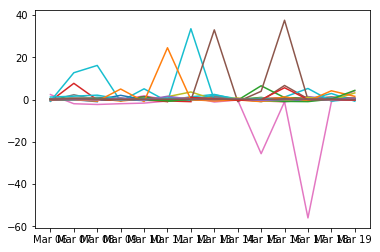

In [11]:
plt.plot(YoY,label = index)
plt.show()

In [12]:
N = f.iat[3,0]
f =f.replace(N,"")
#print(f.to_string())

In [13]:
f['mean']= YoY.mean(axis=0)
f['std']=YoY.std(axis=0)
f['max_corrwith']=max_corrwith
f['max_corrvalur']=corr.max(axis=1)

In [14]:
print(f.to_string())

                                                   Mar 05   Mar 06   Mar 07   Mar 08   Mar 09   Mar 10   Mar 11   Mar 12   Mar 13   Mar 14   Mar 15   Mar 16   Mar 17   Mar 18   Mar 19      mean        std                         max_corrwith  max_corrvalur
Net Sales/Income from operations                  13343.1  14753.1  17205.9  17860.3  20852.5    29623  36299.7  34705.9  42612.6  42644.8  48605.5  56441.2  66909.4  78104.8  83026.5  0.144639   0.113971             Total Shareholders Funds       0.993584
Other Operating Income                                  0        0        0        0        0        0   740.35    881.2   975.37  1055.87  1365.11   1096.9   1125.4   1657.9   2993.8       inf        NaN                    Trade Receivables       0.924891
Total Income From Operations                            0        0  17205.9  17860.3  20852.5    29623  37040.1  35587.1  43587.9  43700.6  49970.6  57538.1  68034.8  79762.7  86020.3       inf        NaN                       Ot

In [15]:
f.to_excel(r"C:\Users\krrish\OneDrive\desktop lenovo\New Downloads\try1.xlsx")